<a href="https://colab.research.google.com/github/TaekGwonNam/2024.VAI/blob/main/%EC%8B%A4%EC%8A%B502_MLP%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
mnist_train=dset.MNIST("",train=True, transform=transforms.ToTensor(),
                       target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False,transform=transforms.ToTensor(),
                      target_transform=None, download=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11672498.25it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 382805.36it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3183115.51it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8655396.99it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



mnist_train길이: 60000
mnist_test 길이: 10000
image data 형태:  torch.Size([1, 28, 28])
label:  5


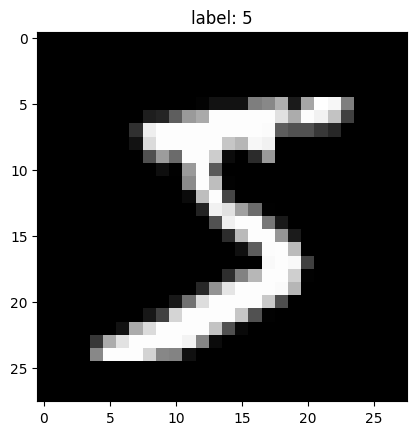

In [3]:
print ("mnist_train길이:", len(mnist_train))
print ("mnist_test 길이:", len(mnist_test))

image, label = mnist_train.__getitem__(0)
print("image data 형태: ", image.size())
print ("label: ", label)

img = image.numpy()
plt.title("label: %d" %label )
plt.imshow(img[0], cmap='gray')
plt.show()

In [4]:
batch_size = 1023
learning_rate = 0.01
numepoch = 400

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                           batch_size=batch_size,
                                           shuffle=True, num_workers=2,
                                           drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,
                                           batch_size=batch_size,
                                           shuffle=False, num_workers=2,
                                           drop_last=True)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[0]
한번에 로드되는 데이터 크기: 1023


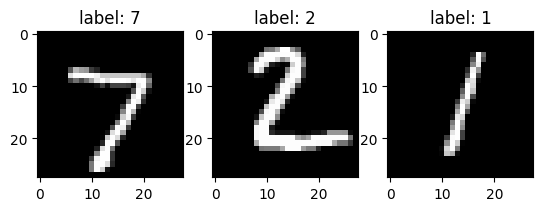

[1]
한번에 로드되는 데이터 크기: 1023


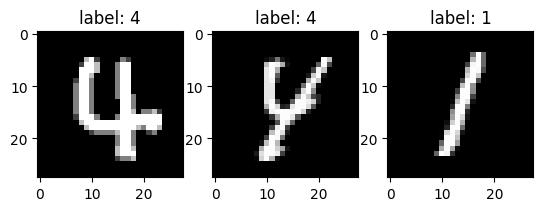

[2]
한번에 로드되는 데이터 크기: 1023


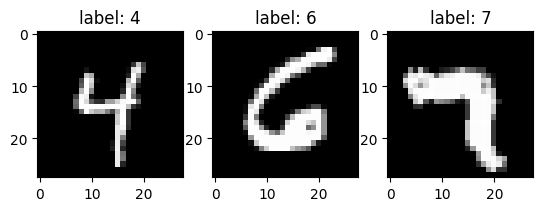

[3]
한번에 로드되는 데이터 크기: 1023


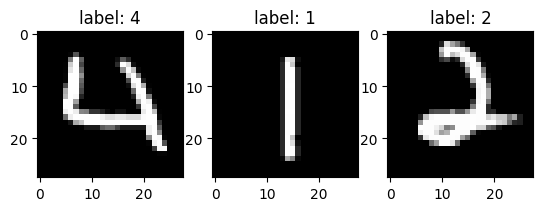

[4]
한번에 로드되는 데이터 크기: 1023


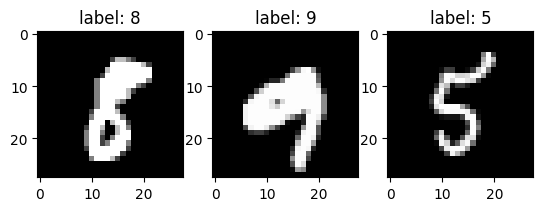

[5]
한번에 로드되는 데이터 크기: 1023


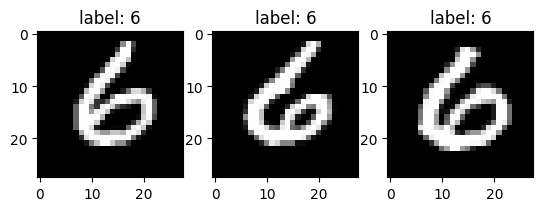

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [6]:
n = 3
for i, [imgs, labels] in enumerate(test_loader):
  if i>5:
    break

  print ("[%d]" %i)
  print ("한번에 로드되는 데이터 크기:", len(imgs))

  for j in range(n):
    img=imgs[j].numpy()
    img = img.reshape((img.shape[1], img.shape[2]))

    plt.subplot(1, n, j+1)
    plt.imshow(img, cmap='gray')
    plt.title("label: %d" %labels[j] )
  plt.show()

In [7]:
model = nn.Sequential(
    nn.Linear(28*28,255),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Linear(128,10)
)

In [8]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))




def softmax(x):
  ex = np.exp(x)
  return ex / np.sum(ex, axis=1, keepdims=True)

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class MyMLP(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        super(MyMLP, self).__init__()
        self.fc1 = nn.Linear(n_input, n_hidden1)
        self.fc2 = nn.Linear(n_hidden1, n_hidden2)
        self.fc3 = nn.Linear(n_hidden2, n_output)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 이미지를 평탄화합니다
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:


def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0

    for j, [imgs, labels] in enumerate(dloader):
        imgs = imgs.view(imgs.size(0), -1)  # 이미지를 평탄화합니다
        img = Variable(imgs)
        label = Variable(labels)
        output = imodel(img)
        _, output_index = torch.max(output, 1)

        total += label.size(0)
        correct += (output_index == label).sum().float()

    print("Accuracy of Test Data: {}".format(100*correct/total))

ComputeAccr(test_loader, model)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12817281.64it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 345387.52it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3203722.32it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3636291.04it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



[0]
한번에 로드되는 데이터 크기: 1024


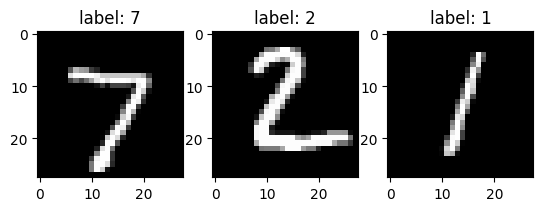

[1]
한번에 로드되는 데이터 크기: 1024


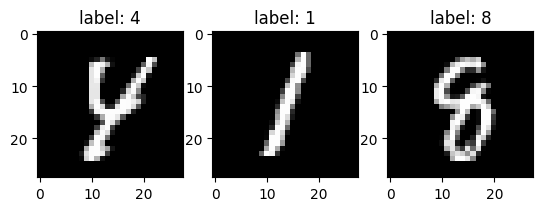

[2]
한번에 로드되는 데이터 크기: 1024


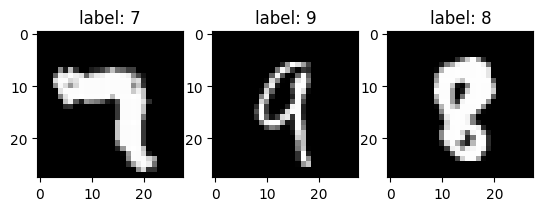

[3]
한번에 로드되는 데이터 크기: 1024


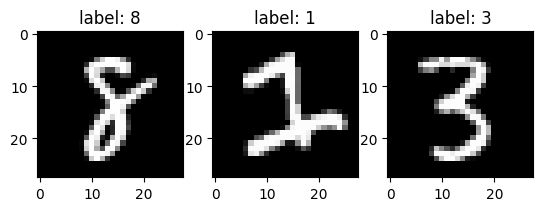

[4]
한번에 로드되는 데이터 크기: 1024


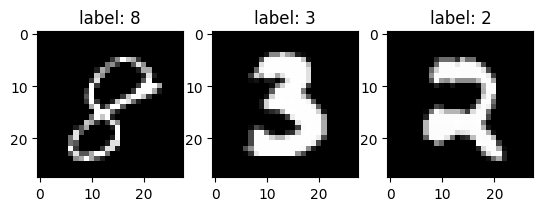

[5]
한번에 로드되는 데이터 크기: 1024


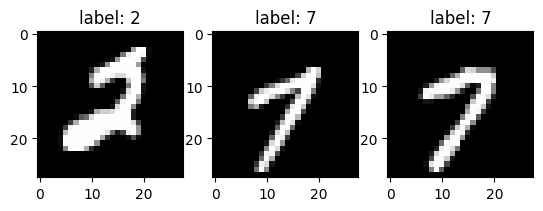

Accuracy of Test Data: 11.30


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# 데이터 로드
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

batch_size = 1024
learning_rate = 0.01
num_epochs = 10

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

# 이미지 확인
n = 3
for i, [imgs, labels] in enumerate(test_loader):
    if i > 5:
        break

    print(f"[{i}]")
    print("한번에 로드되는 데이터 크기:", len(imgs))

    for j in range(n):
        img = imgs[j].numpy()
        img = img.reshape((img.shape[1], img.shape[2]))
        plt.subplot(1, n, j+1)
        plt.imshow(img, cmap='gray')
        plt.title("label: %d" % labels[j])
    plt.show()

# 모델 정의
class MyMLP(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        super(MyMLP, self).__init__()
        self.fc1 = nn.Linear(n_input, n_hidden1)
        self.fc2 = nn.Linear(n_hidden1, n_hidden2)
        self.fc3 = nn.Linear(n_hidden2, n_output)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 이미지를 평탄화합니다
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 생성
model = MyMLP(28*28, 255, 128, 10)

# 손실 함수와 최적화 알고리즘 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 모델 학습
for epoch in range(num_epochs):
    total_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   %(epoch+1, num_epochs, i+1, len(mnist_train)//batch_size, loss.item()))

# 학습된 모델의 정확도 계산
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0

    for j, [imgs, labels] in enumerate(dloader):
        imgs = Variable(imgs)
        label = Variable(labels)
        output = imodel(imgs)
        _, output_index = torch.max(output, 1)

        total += label.size(0)
        correct += (output_index == label).sum().float()

    print("Accuracy of Test Data: %.2f" % (100*correct/total))

ComputeAccr(test_loader, model)


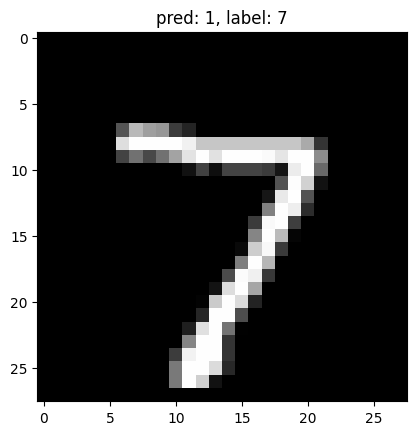

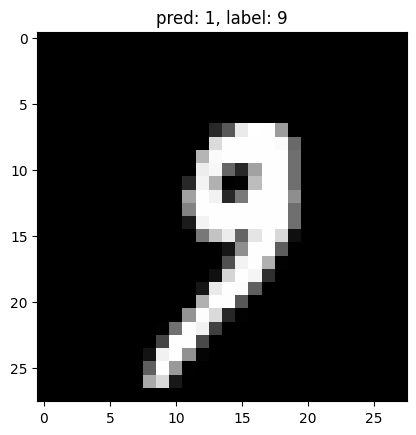

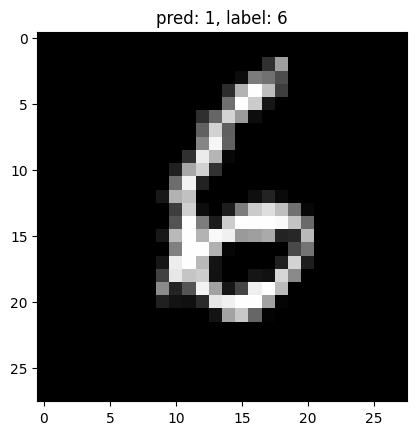

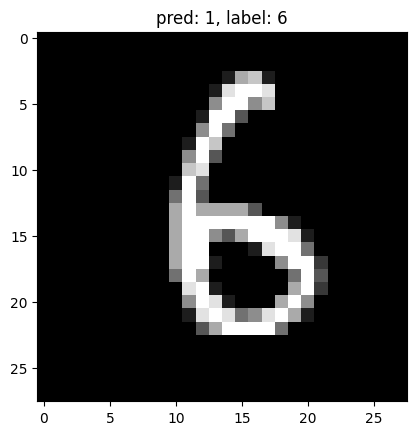

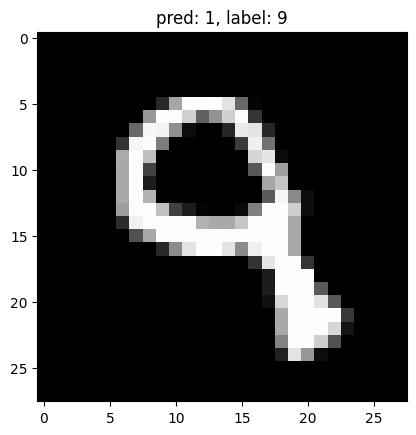

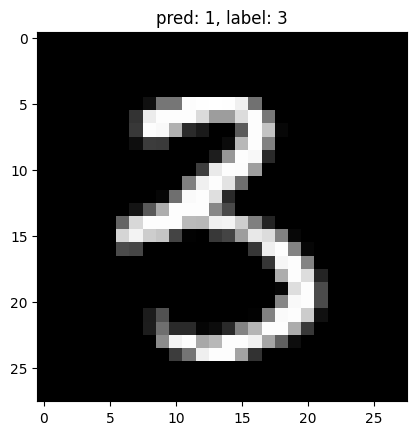

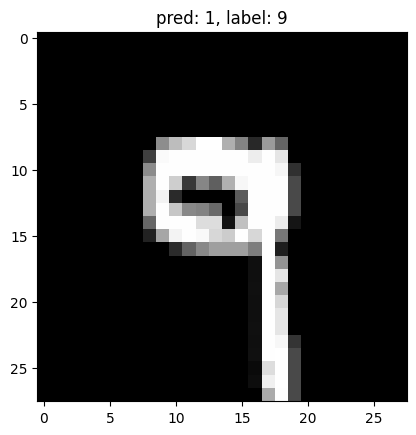

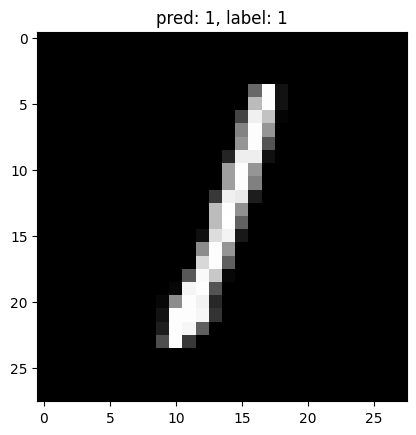

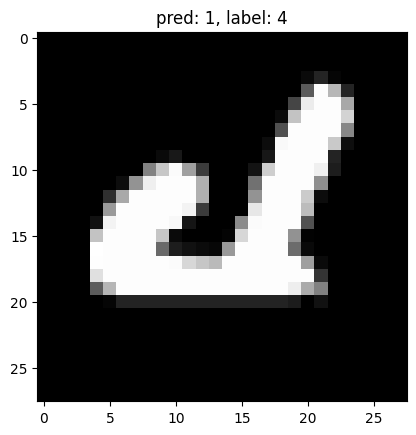

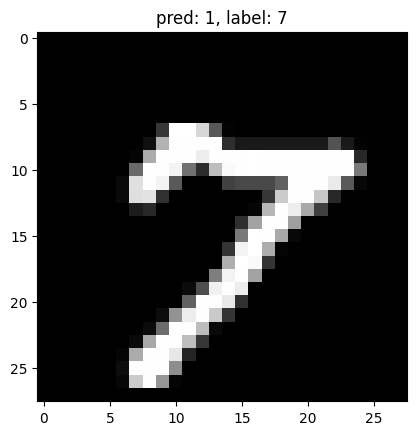

정확도: 11.35


In [11]:
mysum = 0
m = len(mnist_test)
cnt = 0

for i in range(m):
    image, label = mnist_test.__getitem__(i)
    output = model(image.unsqueeze(0))  # 배치 차원 추가

    if (i % 1000 == 0):
        img = image.numpy()
        pred_label = output.argmax().item()  # argmax() 수정
        plt.title("pred: %d, label: %d" %(pred_label, label))
        plt.imshow(img[0], cmap='gray')
        plt.show()

    cnt += 1
    mysum += (output.argmax().item() == label)

print("정확도: %.2f" % ((float(mysum) / cnt) * 100.0))


In [12]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
num_epoch = 400
loss_func = nn.CrossEntropyLoss()

for i in range(num_epoch):
    running_loss = 0.0
    for j, [imgs, labels] in enumerate(train_loader):
        optimizer.zero_grad()

        imgs = imgs.view(imgs.size(0), -1)
        output = model(imgs)
        loss = loss_func(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    if i % 50 == 0:
        print("%d.." % i)
        ComputeAccr(test_loader, model)
        print("Epoch %d, Loss: %.4f" % (i, running_loss / len(train_loader)))


0..
Accuracy of Test Data: 11.30
Epoch 0, Loss: 2.2859
50..
Accuracy of Test Data: 58.25
Epoch 50, Loss: 1.6676
100..
Accuracy of Test Data: 80.31
Epoch 100, Loss: 0.7732
150..
Accuracy of Test Data: 85.83
Epoch 150, Loss: 0.5375
200..
Accuracy of Test Data: 88.18
Epoch 200, Loss: 0.4373
250..
Accuracy of Test Data: 89.36
Epoch 250, Loss: 0.3866
300..
Accuracy of Test Data: 90.07
Epoch 300, Loss: 0.3553
350..
Accuracy of Test Data: 90.68
Epoch 350, Loss: 0.3319


In [16]:
ComputeAccr(test_loader, model)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Accuracy of Test Data: 91.12


In [17]:
netname = './nets/mlp_weight.pkl'
torch.save(model, netname, )

#model = torch.load(netname)